<a href="https://colab.research.google.com/github/harveyvn/Exploring-Datasets-on-Immigration-to-Canada/blob/master/Exploring_Datasets_on_Immigration_to_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Dataset: Immigation to Canada from 1980 to 2013

## I. Preprocessing the Dataset

In [0]:
import numpy as np
import pandas as pd
!pip install -q xlrd

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'

df = pd.read_excel(path, 
                       sheet_name='Canada by Citizenship', 
                       skiprows=range(20), 
                       skipfooter=2)

print ('Data read into a pandas dataframe!')
df.head()

Data read into a pandas dataframe!


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [3]:
print ('Get the list of column headers')
df.columns.values

Get the list of column headers


array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [4]:
def count_missing_value(df):
  '''
  Counting missing values for each column.

  Parameters:
    df (DataFrame): The pandas DataFrame.

  '''

  for column in df.columns:
    print("number of NaN values for the column " + str(column) + 
          " :", df[column].isnull().sum())
    
count_missing_value(df)

number of NaN values for the column Type : 0
number of NaN values for the column Coverage : 0
number of NaN values for the column OdName : 0
number of NaN values for the column AREA : 0
number of NaN values for the column AreaName : 0
number of NaN values for the column REG : 0
number of NaN values for the column RegName : 0
number of NaN values for the column DEV : 0
number of NaN values for the column DevName : 0
number of NaN values for the column 1980 : 0
number of NaN values for the column 1981 : 0
number of NaN values for the column 1982 : 0
number of NaN values for the column 1983 : 0
number of NaN values for the column 1984 : 0
number of NaN values for the column 1985 : 0
number of NaN values for the column 1986 : 0
number of NaN values for the column 1987 : 0
number of NaN values for the column 1988 : 0
number of NaN values for the column 1989 : 0
number of NaN values for the column 1990 : 0
number of NaN values for the column 1991 : 0
number of NaN values for the column 1992 

In [5]:
print ('Clean the dataset to remove unnecessary columns')
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head()

Clean the dataset to remove unnecessary columns


,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [6]:
print ('Rename the columns so that they make sense')
df.rename(columns={'OdName':'Country',
                   'AreaName':'Continent',
                   'RegName':'Region'},
          inplace=True)
df.head()

Rename the columns so that they make sense


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [7]:
print ('A quick summary of each column in our dataframe')
df.describe()

A quick summary of each column in our dataframe


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


## II. Filtering on the Dataset

In [8]:
print ('Filter the list of countries')
df['Country']

Filter the list of countries


0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [9]:
print ('Filter the list of countries and the data for years: 1980-1985')
df[['Country', 1980, 1981, 1982, 1983, 1984, 1985]].head()

Filter the list of countries and the data for years: 1980-1985


,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0


In [10]:
print('The default index of the dataset\n')
print(df.index)

The default index of the dataset

RangeIndex(start=0, stop=195, step=1)


In [11]:
print('Setting the "Country" column as the index to ease a query' + 
      ' by a specific country\n')
df.set_index('Country', inplace=True)
print(df.index)

Setting the "Country" column as the index to ease a query by a specific country

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)


In [12]:
print('Get the full row data of Germany')

print(df.loc['Germany'])

Get the full row data of Germany
Continent               Europe
Region          Western Europe
DevName      Developed regions
1980                      1626
1981                      1977
1982                      3062
1983                      2376
1984                      1610
1985                      1441
1986                      1233
1987                      1704
1988                      1482
1989                      1706
1990                      1273
1991                      1273
1992                      1181
1993                      1488
1994                      1255
1995                      1553
1996                      1686
1997                      1397
1998                      1363
1999                      1717
2000                      1703
2001                      1456
2002                      1375
2003                      1865
2004                      2020
2005                      2226
2006                      2767
2007                      2449
2008  

In [13]:
print('Get the full row data of Germany for year 2010\n') 
print(df.loc['Germany', 2010])

Get the full row data of Germany for year 2010

2956


In [14]:
print('Get the full row data of Germany for years: 1980 - 1985\n') 
print(df.loc['Germany', [1980,1981,1982,1983,1984,1985]])

Get the full row data of Germany for years: 1980 - 1985

1980    1626
1981    1977
1982    3062
1983    2376
1984    1610
1985    1441
Name: Germany, dtype: object


In [15]:
def convert_column_headers_2str(df):
  '''
  Convert the type of column headers to string

  Parameters:
    df (DataFrame): The pandas DataFrame.
  '''

  df.columns = list(map(str, df.columns))
  [print (x + ': ', type(x)) for x in df.columns.values]

convert_column_headers_2str(df)

Continent:  <class 'str'>
Region:  <class 'str'>
DevName:  <class 'str'>
1980:  <class 'str'>
1981:  <class 'str'>
1982:  <class 'str'>
1983:  <class 'str'>
1984:  <class 'str'>
1985:  <class 'str'>
1986:  <class 'str'>
1987:  <class 'str'>
1988:  <class 'str'>
1989:  <class 'str'>
1990:  <class 'str'>
1991:  <class 'str'>
1992:  <class 'str'>
1993:  <class 'str'>
1994:  <class 'str'>
1995:  <class 'str'>
1996:  <class 'str'>
1997:  <class 'str'>
1998:  <class 'str'>
1999:  <class 'str'>
2000:  <class 'str'>
2001:  <class 'str'>
2002:  <class 'str'>
2003:  <class 'str'>
2004:  <class 'str'>
2005:  <class 'str'>
2006:  <class 'str'>
2007:  <class 'str'>
2008:  <class 'str'>
2009:  <class 'str'>
2010:  <class 'str'>
2011:  <class 'str'>
2012:  <class 'str'>
2013:  <class 'str'>


In [16]:
print('Get the full row data within Europe and Region is Western Europe:')
print('Method 01: \n')

condition = (df['Continent'] == 'Europe') & (df['Region'] == 'Western Europe')
print(df[condition])
print(type(df[condition]))

Get the full row data within Europe and Region is Western Europe:
Method 01: 

              Continent          Region            DevName  ...  2011  2012  2013
Country                                                     ...                  
Austria          Europe  Western Europe  Developed regions  ...    84   102    90
Belgium          Europe  Western Europe  Developed regions  ...   332   402   379
France           Europe  Western Europe  Developed regions  ...  4080  6280  5623
Germany          Europe  Western Europe  Developed regions  ...  2053  1702  1217
Liechtenstein    Europe  Western Europe  Developed regions  ...     2     1     0
Luxembourg       Europe  Western Europe  Developed regions  ...    11     6     7
Monaco           Europe  Western Europe  Developed regions  ...     1     3     1
Netherlands      Europe  Western Europe  Developed regions  ...   586   504   395
Switzerland      Europe  Western Europe  Developed regions  ...   266   243   201

[9 rows x 37 colum

In [17]:
print('Method 02: \n')

print(df.loc[(df['Continent'] == 'Europe') & (df['Region'] == 'Western Europe')])
print(type(df.loc[(df['Continent'] == 'Europe') & (df['Region'] == 'Western Europe')]))

Method 02: 

              Continent          Region            DevName  ...  2011  2012  2013
Country                                                     ...                  
Austria          Europe  Western Europe  Developed regions  ...    84   102    90
Belgium          Europe  Western Europe  Developed regions  ...   332   402   379
France           Europe  Western Europe  Developed regions  ...  4080  6280  5623
Germany          Europe  Western Europe  Developed regions  ...  2053  1702  1217
Liechtenstein    Europe  Western Europe  Developed regions  ...     2     1     0
Luxembourg       Europe  Western Europe  Developed regions  ...    11     6     7
Monaco           Europe  Western Europe  Developed regions  ...     1     3     1
Netherlands      Europe  Western Europe  Developed regions  ...   586   504   395
Switzerland      Europe  Western Europe  Developed regions  ...   266   243   201

[9 rows x 37 columns]
<class 'pandas.core.frame.DataFrame'>


## III. Visualizing Data using Matplotlib

In [0]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
print('Get the immigration data of Germany from 1980 to 2013\n')
years = list(map(str, range(1980,2013)))
df_ger = df.loc['Germany', years]
print(type(df_ger))
print(df_ger)

Get the immigration data of Germany from 1980 to 2013

<class 'pandas.core.series.Series'>
1980    1626
1981    1977
1982    3062
1983    2376
1984    1610
1985    1441
1986    1233
1987    1704
1988    1482
1989    1706
1990    1273
1991    1273
1992    1181
1993    1488
1994    1255
1995    1553
1996    1686
1997    1397
1998    1363
1999    1717
2000    1703
2001    1456
2002    1375
2003    1865
2004    2020
2005    2226
2006    2767
2007    2449
2008    3833
2009    3887
2010    2956
2011    2053
2012    1702
Name: Germany, dtype: object


Plot a line graph of immigration from Germany

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012'],
      dtype='object')
Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012],
           dtype='int64')


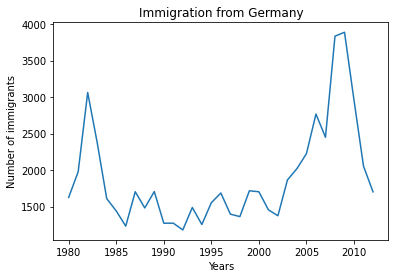

In [20]:
print('Plot a line graph of immigration from Germany\n')

print(df_ger.index)
df_ger.index = df_ger.index.map(int)
print(df_ger.index)

df_ger.plot(kind='line')
plt.title('Immigration from Germany')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

Get the immigration data of China and India from 1980 to 2013

         1980  1981  1982  1983  1984  ...   2008   2009   2010   2011   2012
Country                                ...                                   
China    5123  6682  3308  1863  1527  ...  30037  29622  30391  28502  33024
India    8880  8670  8147  7338  5704  ...  28261  29456  34235  27509  30933

[2 rows x 33 columns]
Plot a line graph of immigration from China and India

Country  China  India
1980      5123   8880
1981      6682   8670
1982      3308   8147
1983      1863   7338
1984      1527   5704
1985      1816   4211
1986      1960   7150
1987      2643  10189
1988      2758  11522
1989      4323  10343
1990      8076  12041
1991     14255  13734
1992     10846  13673
1993      9817  21496
1994     13128  18620
1995     14398  18489
1996     19415  23859
1997     20475  22268
1998     21049  17241
1999     30069  18974
2000     35529  28572
2001     36434  31223
2002     31961  31889
2003     36439  271

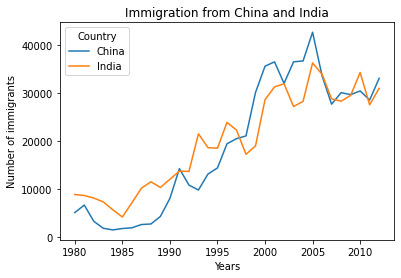

In [21]:
print('Get the immigration data of China and India from 1980 to 2013\n')
years = list(map(str, range(1980,2013)))
df_CI = df.loc[['China', 'India'], years]
print(df_CI)

print('Plot a line graph of immigration from China and India\n')

df_CI = df_CI.transpose()
print(df_CI)

df_CI.plot(kind='line')
plt.title('Immigration from China and India')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

Adding a Total column:
Get the immigration data of top 5 counries to Canada from 1980 to 2013

                                                     1980   1981  ...   2011   2012
Country                                                           ...              
India                                                8880   8670  ...  27509  30933
China                                                5123   6682  ...  28502  33024
United Kingdom of Great Britain and Northern Ir...  22045  24796  ...   6204   6195
Philippines                                          6051   5921  ...  36765  34315
Pakistan                                              978    972  ...   7468  11227

[5 rows x 33 columns]
Plot a line graph of immigration from China and India

Country  India  China  ...  Philippines  Pakistan
1980      8880   5123  ...         6051       978
1981      8670   6682  ...         5921       972
1982      8147   3308  ...         5249      1201
1983      7338   1863  ...         4562

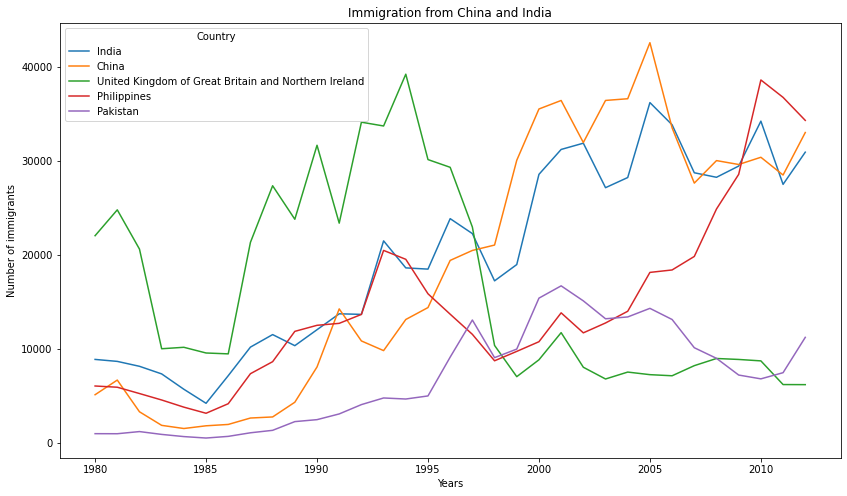

In [22]:
print('Adding a Total column:')
df['Total'] = df.sum(axis=1)

print('Get the immigration data of top 5 counries to Canada from 1980 to 2013\n')
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df.head(5)
df_top5 = df_top5[years]
print(df_top5)

print('Plot a line graph of immigration from China and India\n')

df_top5 = df_top5.transpose()
print(df_top5)

df_top5.plot(kind='line', figsize=(14, 8))
plt.title('Immigration from China and India')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

### a. Area Plot

Visualizing the the top 5 countries that contribued the most immigrantsto Canada from 1980 to 2013 by Area Plot


Text(0.5, 0, 'Years')

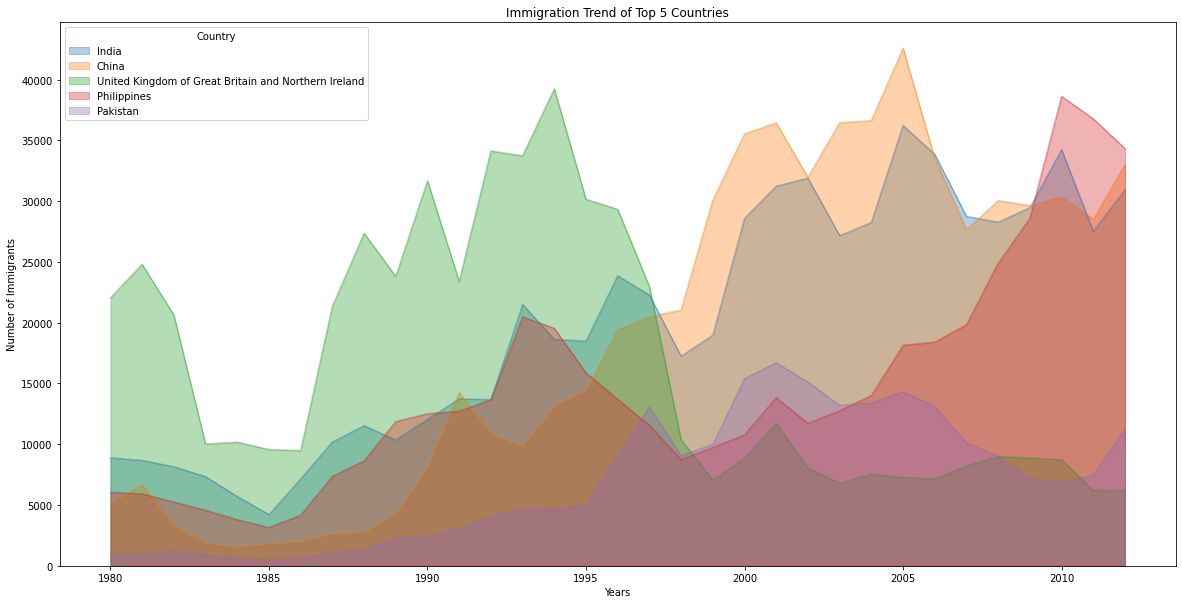

In [30]:
print('Visualizing the the top 5 countries that contribued the most immigrants' 
      + 'to Canada from 1980 to 2013 by Area Plot')

transparency = 0.35
ax = df_top5.plot(kind='area',alpha=transparency,figsize=(20, 10),stacked=False)

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Visualizing the the top 5 countries that contribued the most immigrantsto Canada from 1980 to 2013 by Area Plot


Text(0.5, 0, 'Years')

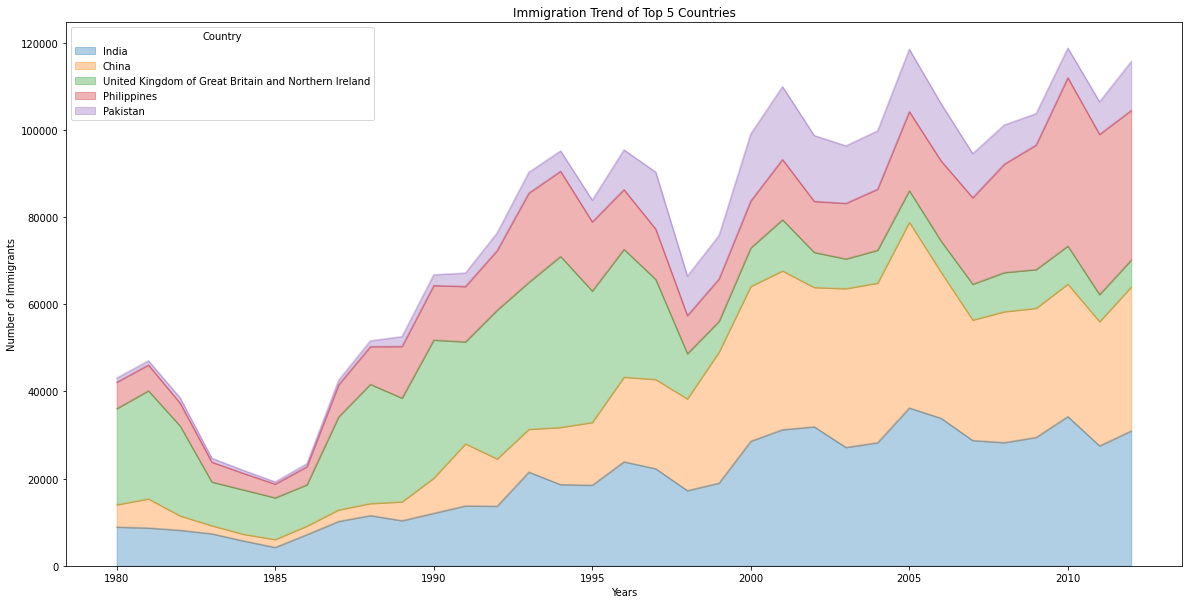

In [31]:
print('Visualizing the the top 5 countries that contribued the most immigrants' 
      + 'to Canada from 1980 to 2013 by Area Plot')

transparency = 0.35
ax = df_top5.plot(kind='area',alpha=transparency,figsize=(20, 10),stacked=True)

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Visualizing the the top 5 countries that contribued the least immigrantsto Canada from 1980 to 2013 by Area Plot


Text(0.5, 0, 'Years')

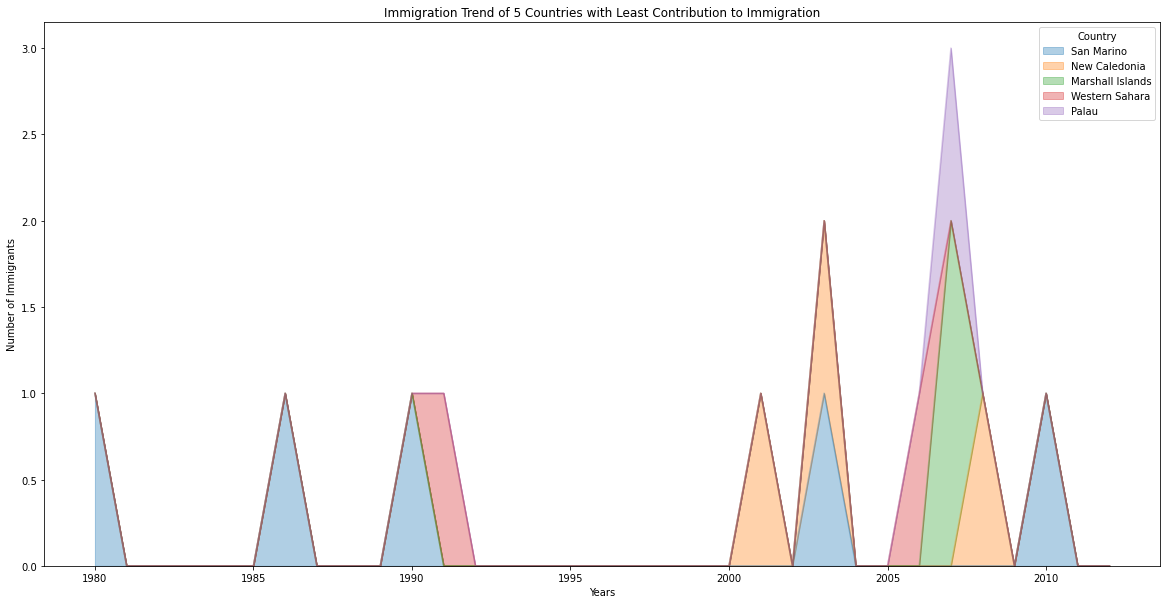

In [32]:
print('Visualizing the the top 5 countries that contribued the least immigrants' 
      + 'to Canada from 1980 to 2013 by Area Plot')

df_least5 = df.tail(5)
df_least5 = df_least5[years]
df_least5 = df_least5.transpose()

transparency = 0.35
ax = df_least5.plot(kind='area',alpha=transparency,figsize=(20, 10),stacked=True)

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

### b. Histogram

The frequency distribution of the number (population) of new immigrantsfrom the various countries to Canada in 2010



Text(0.5, 0, 'Number of Immigrants')

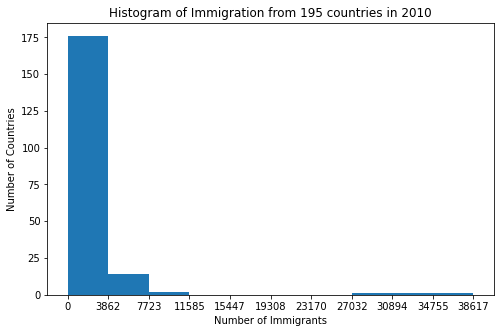

In [42]:
print('The frequency distribution of the number (population) of new immigrants' 
      + 'from the various countries to Canada in 2010\n')

# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df['2010'])

ax = df['2010'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

ax.set_title('Histogram of Immigration from 195 countries in 2010')
ax.set_ylabel('Number of Countries')
ax.set_xlabel('Number of Immigrants')

Text(0.5, 0, 'Number of Immigrants')

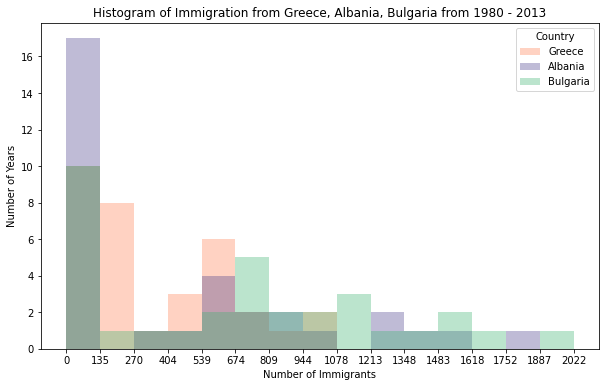

In [45]:
df_cof = df.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()

count, bin_edges = np.histogram(df_cof, 15)
ax = df_cof.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          alpha=0.35,  
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=False,
         )

ax.set_title('Histogram of Immigration from Greece, Albania, Bulgaria from 1980 - 2013')
ax.set_ylabel('Number of Years')
ax.set_xlabel('Number of Immigrants') 

### c. Bar Chart

Let's compare the number of German immigrants to Canada from year 1980 to 2013. 



Text(0.5, 1.0, 'German immigrants to Canada from 1980 to 2013')

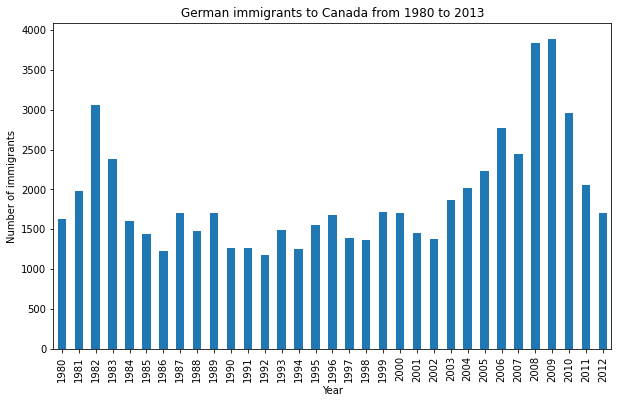

In [50]:
print("Let's compare the number of German immigrants to Canada from year 1980 to 2013. \n")
df_ger = df.loc['Germany', years]

ax = df_ger.plot(kind='bar', figsize=(10, 6))

ax.set_xlabel('Year')
ax.set_ylabel('Number of immigrants')
ax.set_title('German immigrants to Canada from 1980 to 2013')

Let's compare the number of top 3 country' immigrants to Canada from year 1980 to 2013. 



Text(0.5, 1.0, 'Top 3 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

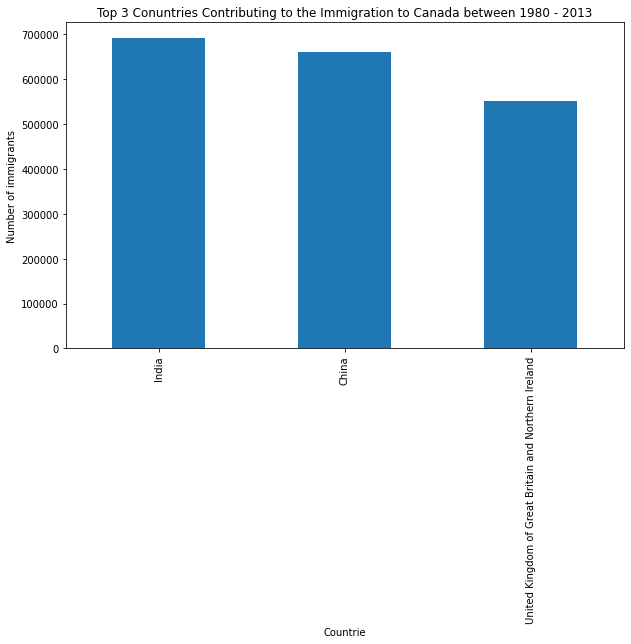

In [71]:
print("Let's compare the number of top 3 country' immigrants to Canada from year 1980 to 2013. \n")

df.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top3 = df.head(3)

ax = df_top3['Total'].plot(kind='bar', figsize=(10, 6))

ax.set_xlabel('Countrie')
ax.set_ylabel('Number of immigrants')
ax.set_title('Top 3 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

Let's compare the number of top 10 country' immigrants to Canada from year 1980 to 2013. 



Text(0.5, 1.0, 'Top 10 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

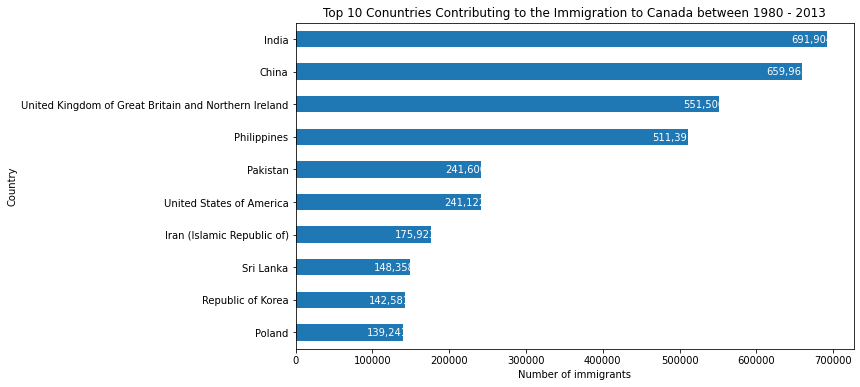

In [75]:
print("Let's compare the number of top 10 country' immigrants to Canada from year 1980 to 2013. \n")

df.sort_values(by='Total', ascending=True, axis=0, inplace=True)
df_top10 = df.tail(10)

ax = df_top10['Total'].plot(kind='barh', figsize=(10, 6))

for index, value in enumerate(df_top10['Total']): 
    label = format(int(value), ',') # format int with commas
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    ax.annotate(label, xy=(value - 47000, index - 0.10), color='white')

ax.set_ylabel('Country')
ax.set_xlabel('Number of immigrants')
ax.set_title('Top 10 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')